In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\Basudev\\Downloads\\Datasets\\datascienceforbusiness-master")

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.shape

(1338, 7)

In [7]:
insurance.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No handles with labels found to put in legend.


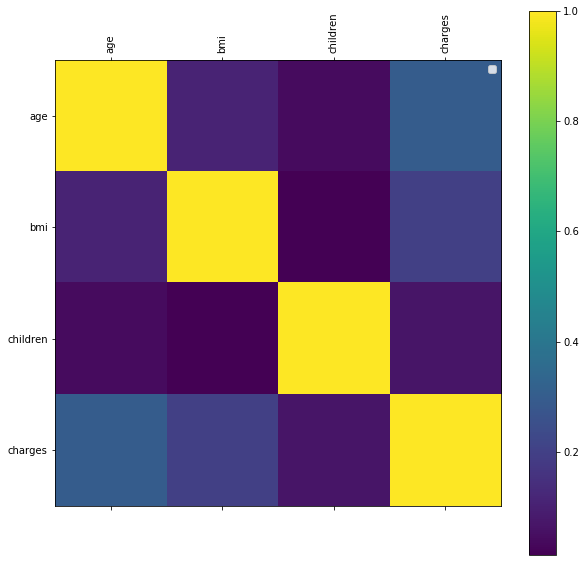

In [11]:
def plot_corr(df, size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(insurance)

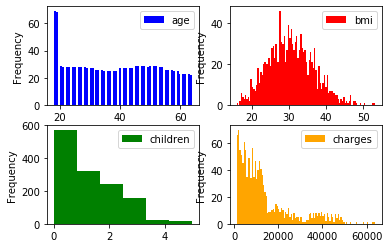

In [12]:
fig, axes = plt.subplots(2, 2,)
insurance.plot(kind = 'hist', y = 'age', bins = 70, color = 'b', ax = axes[0][0])
insurance.plot(kind = 'hist', y = 'bmi', bins = 100, color = 'r', ax = axes[0][1])
insurance.plot(kind = 'hist', y = 'children', bins = 6, color = 'g', ax = axes[1][0])
insurance.plot(kind = 'hist', y = 'charges', bins = 100, color = 'orange', ax = axes[1][1])
plt.show()

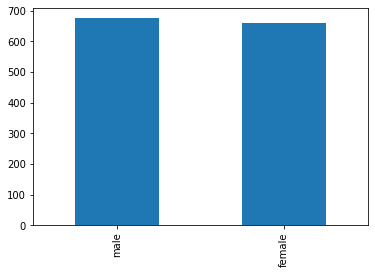

In [13]:
insurance['sex'].value_counts().plot(kind = 'bar')

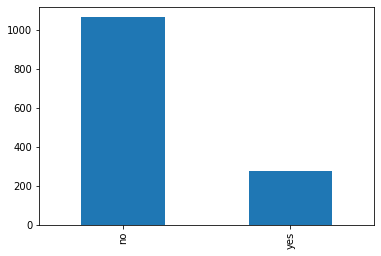

In [14]:
insurance['smoker'].value_counts().plot(kind = 'bar')

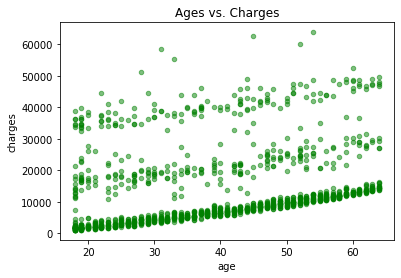

In [15]:
insurance.plot(kind = 'scatter', x = 'age', y = 'charges', alpha = 0.5,
               color = 'green',
               title = 'Ages vs. Charges')
plt.show()

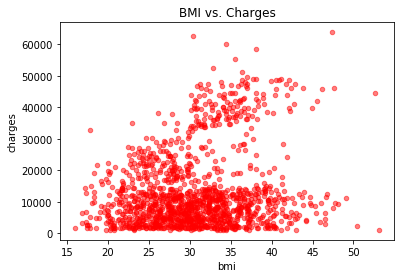

In [16]:
insurance.plot(kind = 'scatter', x = 'bmi', y = 'charges', alpha = 0.5,
               color = 'red', title = 'BMI vs. Charges')
plt.show()

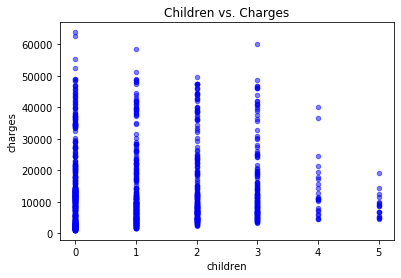

In [17]:
insurance.plot(kind = 'scatter', x = 'children', y = 'charges', alpha = 0.5,
               color = 'blue', title = 'Children vs. Charges')
plt.show()

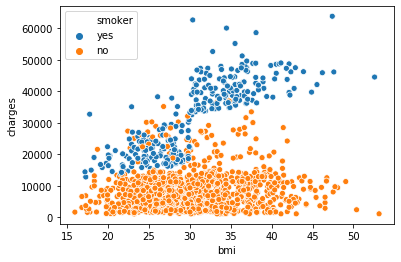

In [18]:
#pal = ['#FA5858', '58D3F7']
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance, hue = 'smoker')

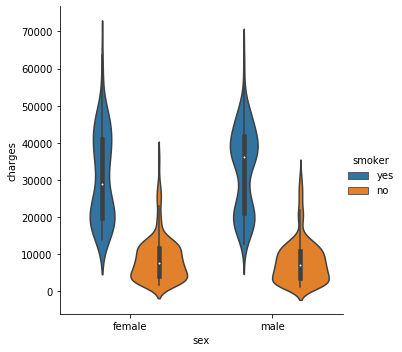

In [19]:
sns.catplot(x = 'sex', y = 'charges', hue = 'smoker', kind = 'violin', data = insurance)

Text(0.5, 1, 'Smokers')

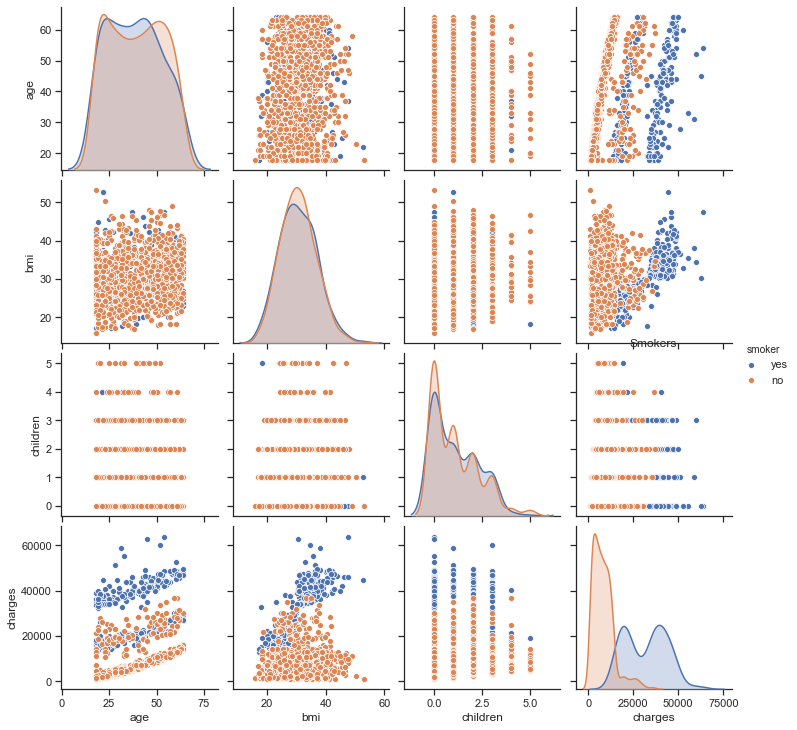

In [20]:
sns.set(style = 'ticks')
sns.pairplot(insurance, hue = 'smoker')
plt.title("Smokers")

In [21]:
insurance.drop(['region'], axis = 1, inplace = True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [22]:
insurance['sex'] = insurance['sex'].map(lambda s: 1 if s == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s: 1 if s == 'yes' else 0)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [23]:
X = insurance.drop(['charges'], axis = 1)
y = insurance.charges

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)
y_t_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.7652077247609824

In [24]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_t_pred})
results

,Actual,Predicted
764,9095.06825,8516.761620
887,5272.17580,6893.859056
890,29330.98315,36776.198772
1293,9301.89355,9464.380662
259,33750.29180,26789.922546
...,...,...
342,13217.09450,12325.644825
308,11944.59435,14267.744340
1128,14358.36437,7785.278314
503,32548.34050,26242.897358


In [25]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
pd.DataFrame(X_train).head()
pd.DataFrame(X_test).head()

,0,1,2,3,4
0,0.421642,1.015038,-0.939625,0.773687,-0.504660
1,-0.217499,1.015038,-0.173516,-0.882448,-0.504660
2,1.770941,1.015038,-0.669234,-0.882448,1.981532
3,0.492658,-0.985184,-0.849495,1.601754,-0.504660
4,-1.424766,-0.985184,0.126919,-0.882448,1.981532


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
multiple_linear_reg = LinearRegression(fit_intercept = False)
multiple_linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree = 3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)
polynomial_reg = LinearRegression(fit_intercept = False)
polynomial_reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [28]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 400, max_depth = 5, random_state = 42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [29]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma = 'auto', kernel = 'linear', C = 1000)
support_vector_reg.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from math import sqrt

y_pred_MLR_train = multiple_linear_reg.predict(X_train)
y_pred_MLR_test = multiple_linear_reg.predict(X_test)
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv = 10)
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
accuracy_cv_MLR

0.717113419200113

In [31]:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv = 10)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
accuracy_cv_PR

0.8391072917688984

In [32]:
y_pred_RFR_train = random_forest_reg.predict(X_train)
y_pred_RFR_test = random_forest_reg.predict(X_test)
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv = 10)
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
accuracy_cv_RFR

0.8574529344156167

In [33]:
y_pred_SVR_train = support_vector_reg.predict(X_train)
y_pred_SVR_test = support_vector_reg.predict(X_test)
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv = 10)
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
accuracy_cv_SVR

0.7058131213464467